In [26]:
# Mengimpor dataset wajah (LFW - Labelled Faces in the Wild) dari scikit-learn
from sklearn.datasets import fetch_lfw_people

# Mengambil dataset wajah dengan syarat minimal 60 wajah per orang
faces = fetch_lfw_people(min_faces_per_person=60)

# Mencetak nama target atau nama individu yang terdapat dalam dataset
print(faces.target_names)

# Mencetak jumlah nama target atau jumlah individu dalam dataset
print(len(faces.target_names))

# Mencetak bentuk dari data gambar wajah
print(faces.images.shape)


['George W Bush' 'Gerhard Schroeder']
2
(386, 62, 47)


In [27]:
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)

(1348, 62, 47)

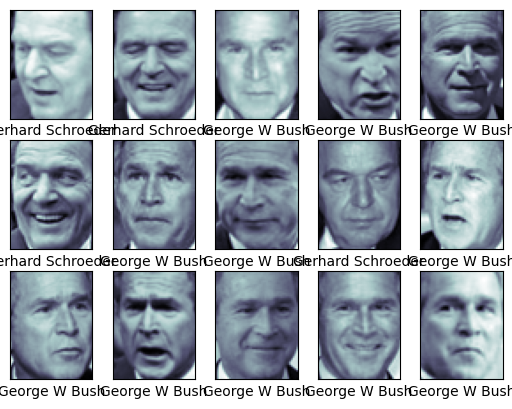

In [28]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [29]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# Membuat objek PCA dengan 150 komponen, whitening, dan seed acak 42
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

# Membuat objek SVM dengan kernel radial basis function (rbf) dan class weight yang seimbang (balanced)
svc = SVC(kernel='rbf', class_weight='balanced')

# Menggabungkan PCA dan SVM ke dalam satu pipeline
model = make_pipeline(pca, svc)


In [30]:
# Mengimpor modul train_test_split dari scikit-learn untuk memisahkan data
from sklearn.model_selection import train_test_split

# Memisahkan dataset menjadi data training dan data testing
# faces.data berisi fitur-fitur wajah, faces.target berisi label (kelas) dari wajah-wajah tersebut
# random_state digunakan untuk mengatur seed acak sehingga hasilnya dapat direproduksi
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)


In [31]:
# Mengimpor modul GridSearchCV dari scikit-learn
from sklearn.model_selection import GridSearchCV

# Menentukan daftar parameter yang akan diuji dengan Grid Search
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Membuat objek GridSearchCV dengan model yang telah dibuat sebelumnya (model dengan PCA dan SVC)
grid = GridSearchCV(model, param_grid)

# Mengukur waktu yang dibutuhkan untuk melakukan Grid Search dan penyesuaian model
%time grid.fit(Xtrain, ytrain)

# Mencetak parameter terbaik yang ditemukan oleh Grid Search
print(grid.best_params_)

# Mencetak skor (score) terbaik yang ditemukan oleh Grid Search
print(grid.best_score_)


CPU times: total: 9.88 s
Wall time: 5.85 s
{'svc__C': 50, 'svc__gamma': 0.001}
0.9516031457955233


In [32]:
# Mengambil model terbaik yang dihasilkan oleh Grid Search
model = grid.best_estimator_

# Menggunakan model terbaik untuk membuat prediksi pada data testing (Xtest)
yfit = model.predict(Xtest)


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

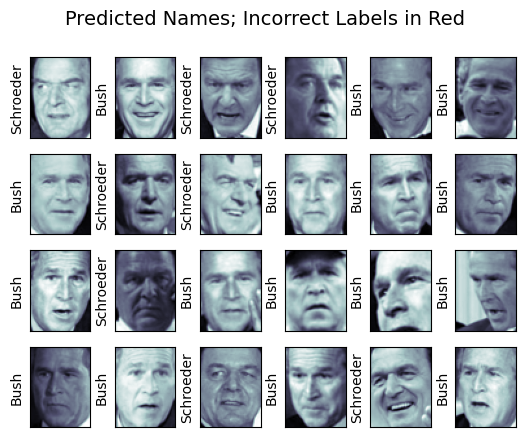

In [33]:
# Membuat subplot dengan ukuran 4 baris dan 6 kolom
fig, ax = plt.subplots(4, 6)

# Menampilkan gambar-gambar wajah pada setiap subplot
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    
    # Menambahkan label pada gambar dengan warna hitam jika prediksi benar, warna merah jika prediksi salah
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

# Menampilkan judul plot
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)


In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

    George W Bush       0.94      0.94      0.94        65
Gerhard Schroeder       0.88      0.88      0.88        32

         accuracy                           0.92        97
        macro avg       0.91      0.91      0.91        97
     weighted avg       0.92      0.92      0.92        97



Text(113.92222222222219, 0.5, 'predicted label')

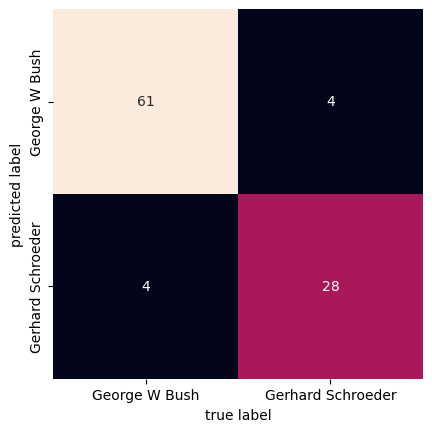

In [35]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [36]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [37]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 10.8 s
Wall time: 6.01 s
{'svc__C': 50, 'svc__gamma': 0.001}
0.9516031457955233


In [39]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

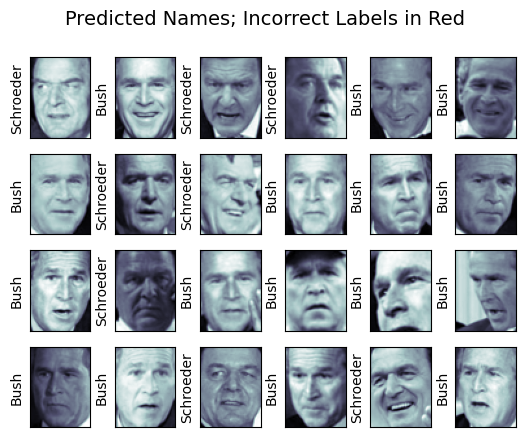

In [40]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)


In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))
       

                   precision    recall  f1-score   support

    George W Bush       0.94      0.94      0.94        65
Gerhard Schroeder       0.88      0.88      0.88        32

         accuracy                           0.92        97
        macro avg       0.91      0.91      0.91        97
     weighted avg       0.92      0.92      0.92        97



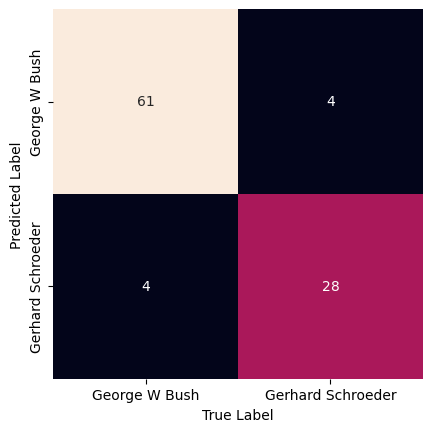

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
mat = confusion_matrix(ytest, yfit)

# Menampilkan confusion matrix dengan heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# Menampilkan plot
plt.show()